In [1]:
#ignoring the warnings
import warnings
warnings.filterwarnings("ignore")
warnings.simplefilter(action='ignore', category=FutureWarning)

In [2]:
# Importing the required library

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.metrics import r2_score,mean_squared_error
from sklearn import metrics

In [3]:
# Reading the csv file

h_data = pd.read_csv(r"C:\Users\Kautuk\Downloads\assignment\train.csv")
h_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
h_data.describe(include='all')

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
count,1460.000000,1460.000000,1460,1201.000000,1460.000000,1460,91,1460,1460,1460,...,1460.000000,7,281,54,1460.000000,1460.000000,1460.000000,1460,1460,1460.000000
unique,NaN,NaN,5,NaN,NaN,2,2,4,4,2,...,NaN,3,4,4,NaN,NaN,NaN,9,6,NaN
top,NaN,NaN,RL,NaN,NaN,Pave,Grvl,Reg,Lvl,AllPub,...,NaN,Gd,MnPrv,Shed,NaN,NaN,NaN,WD,Normal,NaN
freq,NaN,NaN,1151,NaN,NaN,1454,50,925,1311,1459,...,NaN,3,157,49,NaN,NaN,NaN,1267,1198,NaN
mean,730.500000,56.897260,NaN,70.049958,10516.828082,NaN,NaN,NaN,NaN,NaN,...,2.758904,NaN,NaN,NaN,43.489041,6.321918,2007.815753,NaN,NaN,180921.195890
std,421.610009,42.300571,NaN,24.284752,9981.264932,NaN,NaN,NaN,NaN,NaN,...,40.177307,NaN,NaN,NaN,496.123024,2.703626,1.328095,NaN,NaN,79442.502883
min,1.000000,20.000000,NaN,21.000000,1300.000000,NaN,NaN,NaN,NaN,NaN,...,0.000000,NaN,NaN,NaN,0.000000,1.000000,2006.000000,NaN,NaN,34900.000000
25%,365.750000,20.000000,NaN,59.000000,7553.500000,NaN,NaN,NaN,NaN,NaN,...,0.000000,NaN,NaN,NaN,0.000000,5.000000,2007.000000,NaN,NaN,129975.000000
50%,730.500000,50.000000,NaN,69.000000,9478.500000,NaN,NaN,NaN,NaN,NaN,...,0.000000,NaN,NaN,NaN,0.000000,6.000000,2008.000000,NaN,NaN,163000.000000
75%,1095.250000,70.000000,NaN,80.000000,11601.500000,NaN,NaN,NaN,NaN,NaN,...,0.000000,NaN,NaN,NaN,0.000000,8.000000,2009.000000,NaN,NaN,214000.000000


In [5]:
#inspecting the dataframe
# checking the number of rows and columns
h_data.shape

(1460, 81)

In [6]:
h_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [7]:
#Checking the Null values

h_data.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

In [8]:
# Checking if there are columns with one unique value since it won't affect our analysis

h_data.nunique()

Id               1460
MSSubClass         15
MSZoning            5
LotFrontage       110
LotArea          1073
                 ... 
MoSold             12
YrSold              5
SaleType            9
SaleCondition       6
SalePrice         663
Length: 81, dtype: int64

In [9]:
#Checking the value count

h_data.PoolQC.value_counts()

Gd    3
Ex    2
Fa    2
Name: PoolQC, dtype: int64

In [10]:
h_data.Alley.value_counts()

Grvl    50
Pave    41
Name: Alley, dtype: int64

In [11]:
h_data.Street.value_counts()

Pave    1454
Grvl       6
Name: Street, dtype: int64

In [12]:
h_data.Utilities.value_counts()

AllPub    1459
NoSeWa       1
Name: Utilities, dtype: int64

In [13]:
# Checking the percentage of Null values

df_missing=pd.DataFrame((round(100*(h_data.isnull().sum()/len(h_data.index)), 2)), columns=['missing'])
df_missing.sort_values(by=['missing'], ascending=False).head(20)

,missing
PoolQC,99.52
MiscFeature,96.30
Alley,93.77
Fence,80.75
FireplaceQu,47.26
LotFrontage,17.74
GarageYrBlt,5.55
GarageCond,5.55
GarageType,5.55
GarageFinish,5.55


In [14]:
# Treating the NaN Values

h_data['PoolQC'] = h_data['PoolQC'].fillna('No_Pool')
h_data['MiscFeature'] = h_data['MiscFeature'].fillna('None')
h_data['Alley'] = h_data['Alley'].fillna('No_Alley_Access')
h_data['Fence'] = h_data['Fence'].fillna('No_Fence')
h_data['FireplaceQu'] = h_data['FireplaceQu'].fillna('No_Fireplace')
h_data['GarageYrBlt'] = h_data['GarageYrBlt'].fillna(0)
h_data['MasVnrType'] = h_data['MasVnrType'].fillna('None')
h_data['MasVnrArea'] = h_data['MasVnrArea'].fillna(0)
h_data['MasVnrArea'] = h_data['MasVnrArea'].fillna(0)
h_data['Electrical'] = h_data['Electrical'].fillna("Other")

In [15]:
# Dropping the LotFontgage columns as it has more Null values

h_data.drop("LotFrontage",axis = 1, inplace=True)

In [16]:
h_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          1460 non-null   object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

In [17]:
h_data['GarageYrBlt'] = h_data['GarageYrBlt'].astype(int)

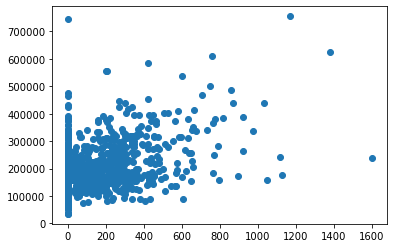

In [18]:
# Univariate and Bivariate Analysis

plt.scatter(h_data.MasVnrArea,h_data.SalePrice)

Text(0.5, 1.0, 'Veneer Area')

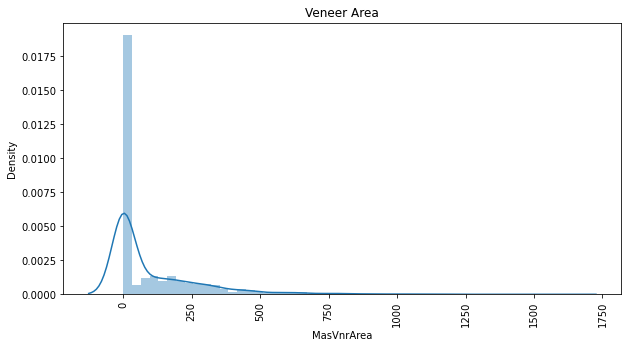

In [19]:
# plotting a distplot

plt.figure(figsize = (10,5))
sns.distplot(h_data['MasVnrArea']).tick_params(axis='x', rotation = 90)
plt.title('Veneer Area')

<AxesSubplot:xlabel='SalePrice', ylabel='Density'>

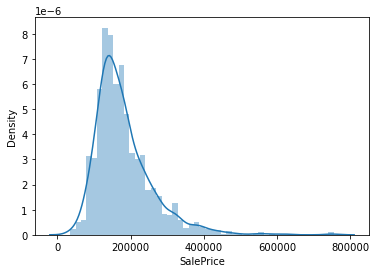

In [20]:
sns.distplot(h_data['SalePrice'])

In [21]:
print("Skewness: %f" % h_data['SalePrice'].skew())

print("Kurtosis: %f" % h_data['SalePrice'].kurt())

Skewness: 1.882876
Kurtosis: 6.536282


Text(0.5, 1.0, 'Basement Condition')

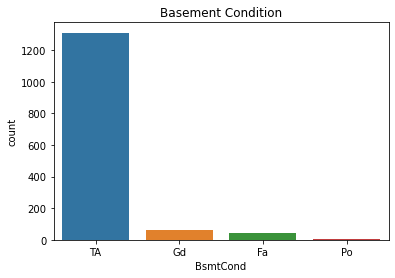

In [22]:
# Checking Basement counts

sns.countplot(x='BsmtCond', data= h_data)
plt.title('Basement Condition')

Text(0.5, 1.0, 'Overall Condition')

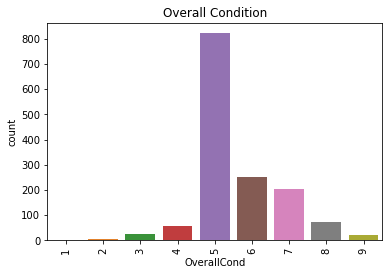

In [23]:
sns.countplot(x='OverallCond', data= h_data).tick_params(axis='x', rotation = 90)
plt.title('Overall Condition')

Text(0.5, 1.0, 'Gr LivArea vs SalePrice')

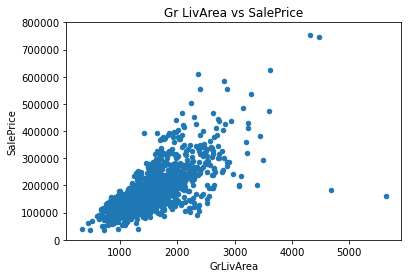

In [24]:
data = pd.concat([h_data['SalePrice'], h_data['GrLivArea']], axis=1)
data.plot.scatter(x='GrLivArea', y='SalePrice', ylim=(0,800000));

plt.title('Gr LivArea vs SalePrice')

<AxesSubplot:xlabel='SalePrice'>

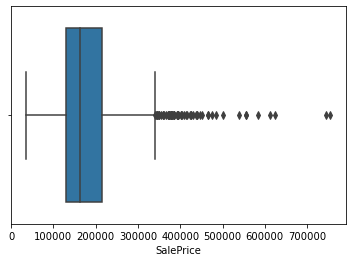

In [25]:
# Checking the outliers 

sns.boxplot(x='SalePrice', data=h_data)

Text(0.5, 1.0, 'Overall Quality vs SalePrice')

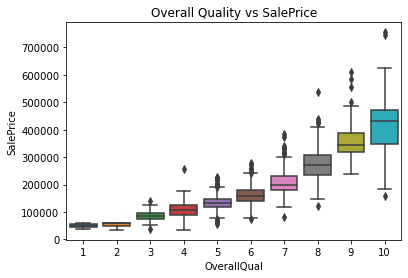

In [26]:
sns.boxplot(x='OverallQual', y='SalePrice', data=h_data)
plt.title("Overall Quality vs SalePrice")

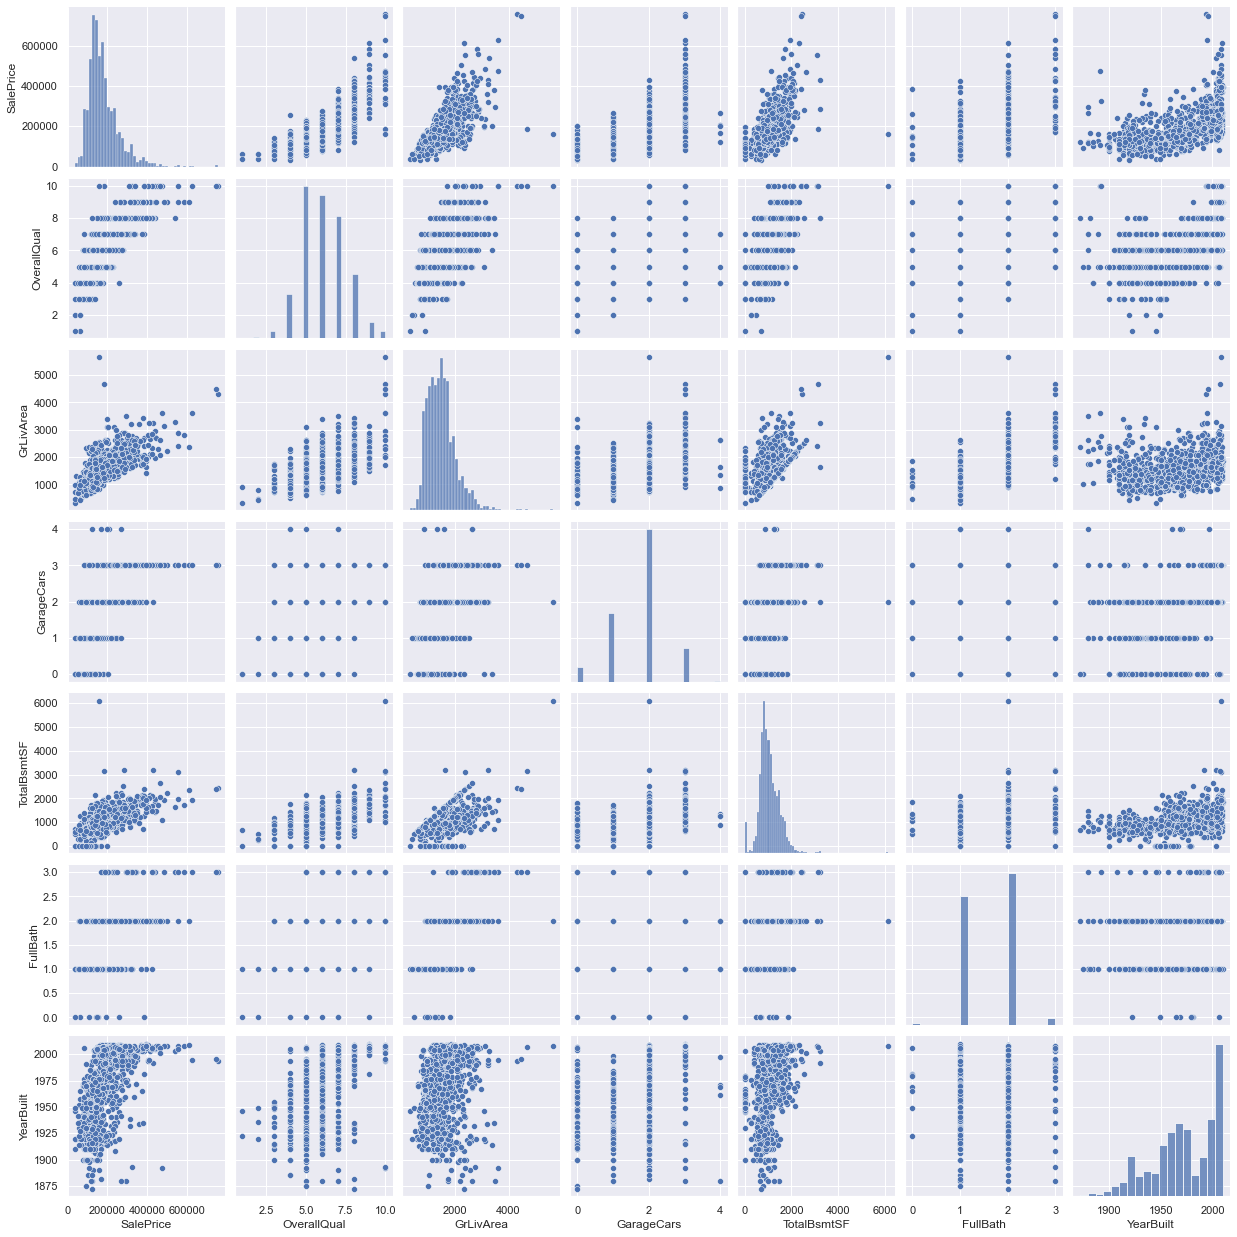

In [28]:
# scatterplot

sns.set()
cols = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'YearBuilt']
sns.pairplot(h_data[cols], size = 2.5)
plt.show();

Text(0.5, 1.0, 'Checking Correlation matrix ')

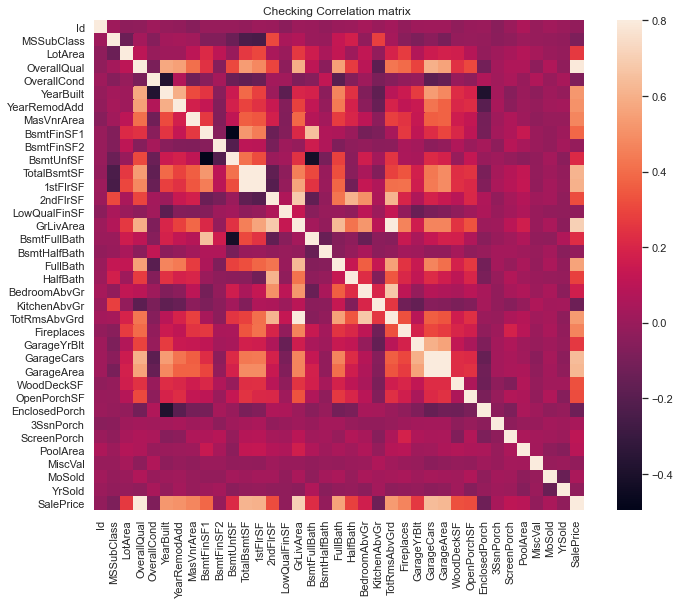

In [29]:
# checking the correlation matrix

corrmat = h_data.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);
plt.title("Checking Correlation matrix ")

<AxesSubplot:xlabel='SalePrice', ylabel='Density'>

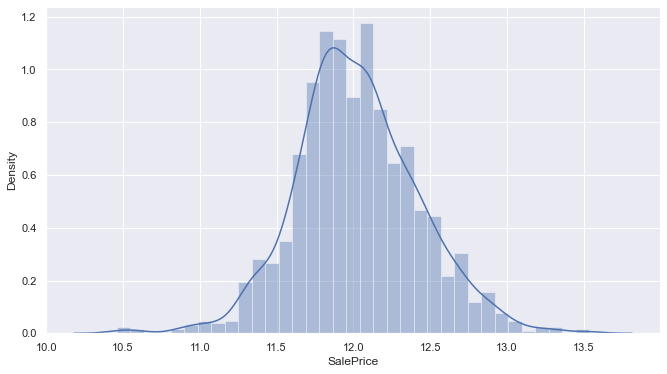

In [30]:
plt.figure(figsize=(11,6))
sns.distplot(np.log(h_data["SalePrice"]))

In [31]:
numeric_data = h_data.select_dtypes(include = ['float64','int64'])
numeric_data.columns

Index(['Id', 'MSSubClass', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

In [32]:
#Converting a Binary varible into numeric datatypes and mapping it to 0 and 1
h_data['Street'] = h_data['Street'].apply(lambda x: 1 if x == 'Pave' else 0 )

h_data['CentralAir'] = h_data['CentralAir'].apply(lambda x : 1 if x == 'Y' else 0)
                                                  
h_data['PavedDrive'] = h_data['PavedDrive'].apply(lambda x : 1 if x == 'Y' else 0)

In [33]:
cat_values = h_data.select_dtypes(include=['object'])
cat_values.head()

,MSZoning,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,...,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,RL,No_Alley_Access,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,...,No_Fireplace,Attchd,RFn,TA,TA,No_Pool,No_Fence,None,WD,Normal
1,RL,No_Alley_Access,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,...,TA,Attchd,RFn,TA,TA,No_Pool,No_Fence,None,WD,Normal
2,RL,No_Alley_Access,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,...,TA,Attchd,RFn,TA,TA,No_Pool,No_Fence,None,WD,Normal
3,RL,No_Alley_Access,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,...,Gd,Detchd,Unf,TA,TA,No_Pool,No_Fence,None,WD,Abnorml
4,RL,No_Alley_Access,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,...,TA,Attchd,RFn,TA,TA,No_Pool,No_Fence,None,WD,Normal


In [34]:
# converting into dummies

data_dummies = pd.get_dummies(cat_values, drop_first=True)
data_dummies.head()

,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Alley_No_Alley_Access,Alley_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,0,0,1,0,1,0,0,0,1,0,...,0,0,0,0,1,0,0,0,1,0
1,0,0,1,0,1,0,0,0,1,0,...,0,0,0,0,1,0,0,0,1,0
2,0,0,1,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
3,0,0,1,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,0,0,1,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0


In [35]:
# Droping the 'Id' column 

df = h_data.drop(['Id'],axis=1)

In [36]:
# Droping the original categorical column

df = df.drop(list(cat_values.columns), axis=1)

In [38]:
# Adding the dummy categorical column to original dataset

df = pd.concat([df,data_dummies], axis=1)
df.shape

(1460, 461)

In [39]:
# Train Test Split

df_train,df_test = train_test_split(df, train_size=0.7,test_size = 0.3, random_state=100)

In [40]:
y_train = np.log(df_train.SalePrice)
X_train = df_train.drop("SalePrice",1)

y_test= np.log(df_test.SalePrice)
X_test = df_test.drop("SalePrice",1)

In [41]:
num_values=X_train.select_dtypes(include=['int64','float64']).columns
num_values

Index(['MSSubClass', 'LotArea', 'Street', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', 'CentralAir', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageCars', 'GarageArea', 'PavedDrive', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold'],
      dtype='object')

In [42]:
# Scaling the data
scaler = StandardScaler()

X_train[num_values] = scaler.fit_transform(X_train[num_values])
X_test[num_values] = scaler.transform(X_test[num_values])

In [43]:
# Building the Regression model

reg = LinearRegression()
reg.fit(X_train,y_train)

LinearRegression()

In [44]:
# Calculating the RFE

rfe = RFE(reg, 20)
rfe = rfe.fit(X_train, y_train)

In [45]:
col=X_train.columns[rfe.support_]
col

Index(['MSZoning_RM', 'Alley_No_Alley_Access', 'LandContour_Lvl',
       'LotConfig_CulDSac', 'LotConfig_FR2', 'Exterior1st_HdBoard',
       'Exterior1st_VinylSd', 'BsmtFinType1_GLQ', 'FireplaceQu_No_Fireplace',
       'SaleType_New', 'MSZoning_RM', 'Alley_No_Alley_Access',
       'LandContour_Lvl', 'LotConfig_CulDSac', 'LotConfig_FR2',
       'Exterior1st_HdBoard', 'Exterior1st_VinylSd', 'BsmtFinType1_GLQ',
       'FireplaceQu_No_Fireplace', 'SaleType_New'],
      dtype='object')

In [46]:
import statsmodels
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [47]:
X_train_new=X_train[col]
X_train_new = sm.add_constant(X_train_new)

#create first model
lr=sm.OLS(y_train,X_train_new)

#fit the model
lr_model=lr.fit()

#Print the summary 
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.548
Model:                            OLS   Adj. R-squared:                  0.543
Method:                 Least Squares   F-statistic:                     122.4
Date:                Wed, 02 Feb 2022   Prob (F-statistic):          2.12e-166
Time:                        22:37:00   Log-Likelihood:                -98.980
No. Observations:                1021   AIC:                             220.0
Df Residuals:                    1010   BIC:                             274.2
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                       12.0699      0.044    273.279      0.000      11.983      12.157
MSZoning_RM               2.602e+11   1.47e+11      1.766      0.078   -2.89e+10    5.49e+11
MSZoning_RM               4.775e+11    2.7e+11      1.766      0.078   -5.31e+10    1.01e+12
Alley_No_Alley_Access     -1.33e+12   7.53e+11     -1.766      0.078   -2.81e+12    1.48e+11
Alley_No_Alley_Access    -1.388e+12   7.86e+11     -1.766      0.078   -2.93e+12    1.54e+11
LandContour_Lvl          -1.544e+12   8.75e+11     -1.766      0.078   -3.26e+12    1.72e+11
LandContour_Lvl          -1.693e+12   9.58e+11     -1.766      0.078   -3.57e+12    1.88e+11
LotConfig_CulDSac        -5.656e+09    3.2e+09     -1.766      0.078   -1.19e+10    6.29e+08
LotConfig_CulDSac        -2.759e+10   1.56e+10     -1.766      0.078   -5.83e+10    3.07e+09
LotConfig_FR2            -1.659e+10   9.39e+09     -1.766      0.078    -3.5e+10    1.85e+09
LotConfig_FR2             -2.65e+10    1.5e+10     -1.766      0.078    -5.6e+10    2.95e+09
Exterior1st_HdBoard       -4.74e+10   2.68e+10     -1.766      0.078      -1e+11    5.27e+09
Exterior1st_HdBoard       1.969e+11   1.12e+11      1.766      0.078   -2.19e+10    4.16e+11
Exterior1st_VinylSd        1.07e+11   6.06e+10      1.766      0.078   -1.19e+10    2.26e+11
Exterior1st_VinylSd       -2.59e+11   1.47e+11     -1.766      0.078   -5.47e+11    2.88e+10
BsmtFinType1_GLQ         -9.777e+09   5.54e+09     -1.766      0.078   -2.06e+10    1.09e+09
BsmtFinType1_GLQ          3.259e+09   1.85e+09      1.766      0.078   -3.63e+08    6.88e+09
FireplaceQu_No_Fireplace  1.686e+11   9.55e+10      1.766      0.078   -1.88e+10    3.56e+11
FireplaceQu_No_Fireplace  1.953e+11   1.11e+11      1.766      0.078   -2.17e+10    4.12e+11
SaleType_New             -2.613e+09   1.48e+09     -1.766      0.078   -5.52e+09    2.91e+08
SaleType_New              3.119e+09   1.77e+09      1.766      0.078   -3.47e+08    6.58e+09
MSZoning_RM              -3.444e+11   1.95e+11     -1.766      0.078   -7.27e+11    3.83e+10
MSZoning_RM              -3.932e+11   2.23e+11     -1.766      0.078    -8.3e+11    4.37e+10
Alley_No_Alley_Access     7.191e+11   4.07e+11      1.766      0.078      -8e+10    1.52e+12
Alley_No_Alley_Access     1.999e+12   1.13e+12      1.766      0.078   -2.22e+11    4.22e+12
LandContour_Lvl           1.618e+12   9.17e+11      1.766      0.078    -1.8e+11    3.42e+12
LandContour_Lvl           1.618e+12   9.17e+11      1.766      0.078    -1.8e+11    3.42e+12
LotConfig_CulDSac         1.662e+10   9.41e+09      1.766      0.078   -1.85e+09    3.51e+10
LotConfig_CulDSac         1.662e+10   9.41e+09      1.766      0.078   -1.85e+09    3.51e+10
LotConfig_FR2             1.059e+10   5.99e+09      1.766      0.078   -1.18e+09    2.23e+10
LotConfig_FR2 

In [51]:
# Redge Regression

In [52]:
# list of alphas to tune


params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100]}


ridge = Ridge()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train, y_train)

Fitting 5 folds for each of 26 candidates, totalling 130 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 130 out of 130 | elapsed:    4.2s finished


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [53]:
print(model_cv.best_params_)
print(model_cv.best_score_)

{'alpha': 0.3}
-0.08862322169282674


In [54]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results = cv_results[cv_results['param_alpha']<=100]
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.019746,0.000745,0.006591,0.001355,0.0001,{'alpha': 0.0001},-0.090824,-0.095363,-0.094508,-0.086960,...,-0.090128,0.004651,14,-0.054934,-0.055387,-0.056311,-0.056832,-0.055970,-0.055887,0.000669
1,0.022539,0.005374,0.007181,0.001163,0.001,{'alpha': 0.001},-0.090681,-0.095346,-0.094492,-0.086885,...,-0.090065,0.004669,13,-0.054949,-0.055390,-0.056317,-0.056884,-0.055990,-0.055906,0.000680
2,0.019547,0.003254,0.006582,0.000798,0.01,{'alpha': 0.01},-0.090218,-0.095191,-0.094394,-0.086463,...,-0.089708,0.004859,12,-0.055051,-0.055434,-0.056368,-0.057064,-0.056108,-0.056005,0.000707
3,0.018146,0.002301,0.005790,0.001461,0.05,{'alpha': 0.05},-0.089804,-0.094679,-0.094153,-0.085262,...,-0.089216,0.004892,10,-0.055508,-0.055667,-0.056603,-0.057397,-0.056494,-0.056334,0.000686
4,0.019348,0.002326,0.006780,0.001322,0.1,{'alpha': 0.1},-0.089508,-0.094257,-0.094042,-0.084143,...,-0.088924,0.004836,6,-0.056120,-0.055931,-0.056919,-0.057797,-0.057062,-0.056766,0.000677
5,0.020944,0.001994,0.006183,0.001716,0.2,{'alpha': 0.2},-0.089218,-0.093812,-0.094202,-0.082777,...,-0.088640,0.004942,2,-0.057331,-0.056384,-0.057517,-0.058704,-0.058190,-0.057625,0.000790
6,0.021743,0.002308,0.005983,0.001261,0.3,{'alpha': 0.3},-0.089237,-0.093654,-0.094562,-0.082002,...,-0.088623,0.005088,1,-0.058440,-0.056756,-0.058101,-0.059696,-0.059156,-0.058430,0.001004
7,0.020346,0.002326,0.006982,0.002360,0.4,{'alpha': 0.4},-0.089450,-0.093559,-0.094903,-0.081383,...,-0.088682,0.005239,3,-0.059409,-0.057092,-0.058697,-0.060643,-0.060029,-0.059174,0.001225
8,0.022141,0.001934,0.008577,0.001738,0.5,{'alpha': 0.5},-0.089675,-0.093547,-0.095204,-0.080816,...,-0.088755,0.005409,4,-0.060272,-0.057409,-0.059275,-0.061478,-0.060866,-0.059860,0.001425
9,0.024936,0.003730,0.007976,0.001409,0.6,{'alpha': 0.6},-0.089924,-0.093607,-0.095472,-0.080347,...,-0.088843,0.005583,5,-0.061041,-0.057685,-0.059813,-0.062239,-0.061648,-0.060485,0.001614


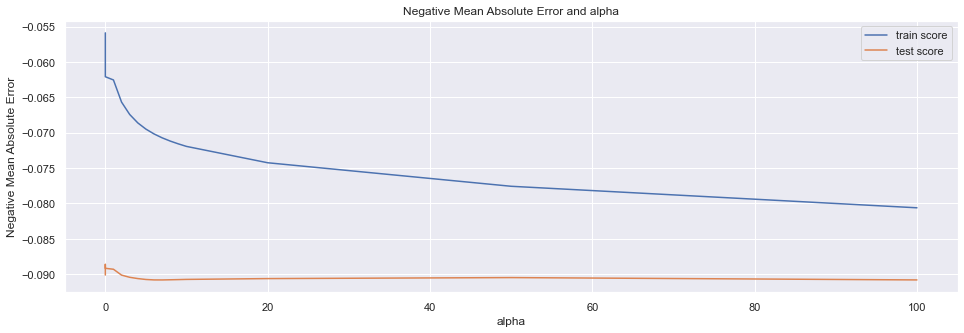

In [55]:
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('int32')
plt.figure(figsize=(16,5))

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper right')
plt.show()

In [56]:
#final ridge model
alpha = 10
ridge = Ridge(alpha=alpha)

ridge.fit(X_train, y_train)
ridge.coef_

array([-2.02877871e-02,  1.90079885e-02,  6.44474691e-03,  7.48416380e-02,
        3.91270426e-02,  3.44548293e-02,  2.07740984e-02, -3.56172133e-03,
        1.77386060e-03,  1.03638442e-02,  6.40327129e-03,  1.19099521e-02,
        1.49272167e-02,  3.43362352e-02,  4.41006509e-02,  1.11879392e-03,
        6.18721614e-02,  2.83790885e-02,  2.77085893e-03,  1.75217185e-02,
        1.01097679e-02,  1.19984964e-02, -1.57138049e-02,  1.51804707e-02,
       -7.33132332e-04,  9.33134447e-06,  3.88635651e-02,  4.06571954e-03,
        1.36040556e-03,  1.34175991e-02, -1.54905057e-03,  8.99794007e-03,
        6.97632472e-03,  1.05575169e-02, -1.30145947e-02,  3.45551281e-04,
       -1.11945827e-03, -5.78860249e-03,  3.65436888e-02,  3.57142308e-02,
        4.54564302e-02,  2.70639169e-02,  1.95023772e-03,  1.61037127e-02,
        1.32066205e-02, -3.14076294e-02,  3.10309260e-03,  2.54716114e-02,
        2.35123472e-02,  2.87493565e-02, -1.17002717e-02,  1.94177255e-02,
       -2.15021617e-02, -

In [58]:
# predicting the R-squared value

y_train_pred = ridge.predict(X_train)
print(metrics.r2_score(y_true=y_train, y_pred=y_train_pred))

0.927907756165618


In [59]:
# Prediction on test set

y_test_pred = ridge.predict(X_test)
print(metrics.r2_score(y_true=y_test, y_pred=y_test_pred))

0.8828647333997758


In [60]:
# Printing the RMSE value

mean_squared_error(y_test, y_test_pred)

0.01927345041594043

In [61]:
# Lasso Regression

params = {'alpha': [0.00005, 0.0001, 0.001, 0.008, 0.01]}
lasso = Lasso()

# cross validation
lasso_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

lasso_cv.fit(X_train, y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  25 out of  25 | elapsed:    2.4s finished


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [5e-05, 0.0001, 0.001, 0.008, 0.01]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [62]:
cv_results_l = pd.DataFrame(lasso_cv.cv_results_)

In [63]:
print(lasso_cv.best_params_)
print(lasso_cv.best_score_)

{'alpha': 0.0001}
-0.08334125156355933


In [64]:
#final lasso model

alpha = 0.001

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train, y_train) 

Lasso(alpha=0.001)

In [65]:
# Predicting the R-squared value for Train data

y_train_pred = lasso.predict(X_train)
print(metrics.r2_score(y_true=y_train, y_pred=y_train_pred))

0.9174441199328801


In [66]:
mean_squared_error(y_test, y_test_pred)

0.01927345041594043

In [67]:
lasso.coef_


array([-1.58986171e-02,  1.77334730e-02,  7.45511944e-03,  8.92616965e-02,
        4.49726704e-02,  5.24448369e-02,  2.11913084e-02,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  2.73440750e-02,
        1.31727183e-02,  5.52310359e-04,  0.00000000e+00, -2.81084571e-03,
        1.18034781e-01,  3.11417614e-02,  2.03093745e-03,  1.33925702e-02,
        8.44108861e-03,  5.66563936e-03, -1.15588676e-02,  1.31358767e-02,
        6.75334113e-03, -1.46950326e-06,  3.89272009e-02,  5.91586336e-03,
        1.83206831e-03,  1.28751810e-02, -0.00000000e+00,  6.00154063e-03,
        5.33416700e-03,  1.05850630e-02, -1.35226648e-02, -9.34653395e-04,
       -1.36123291e-03, -5.93816447e-03,  0.00000000e+00,  0.00000000e+00,
        4.64389538e-02, -1.06160412e-03,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00, -0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  8.00693098e-06, -0.00000000e+00,  2.72959642e-02,
       -0.00000000e+00, -

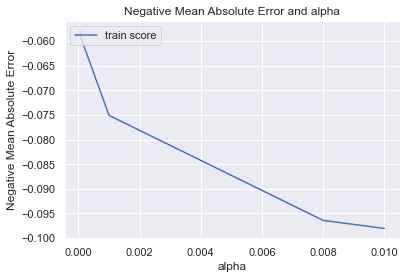

In [68]:
# plotting mean test and train scoes with alpha

cv_results['param_alpha'] = cv_results['param_alpha'].astype('float32')

# plotting
plt.plot(cv_results_l['param_alpha'], cv_results_l['mean_train_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')

plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

In [69]:
model_cv.best_params_

{'alpha': 0.3}

In [70]:
ridge = Ridge(alpha = 0.1)
ridge.fit(X_train,y_train)

y_pred_train = ridge.predict(X_train)
print(r2_score(y_train,y_pred_train))

y_pred_test = ridge.predict(X_test)
print(r2_score(y_test,y_pred_test))

0.9582812368419753
0.7221110873092231


In [71]:
model_parameter = list(ridge.coef_)
model_parameter.insert(0,ridge.intercept_)
cols = df_train.columns
cols.insert(0,'constant')
ridge_coef = pd.DataFrame(list(zip(cols,model_parameter)))
ridge_coef.columns = ['Feaure','Coef']

In [72]:
ridge_coef.sort_values(by='Coef',ascending=False).head(10)

,Feaure,Coef
0,MSSubClass,10.624452
114,RoofMatl_Membran,0.261008
325,RoofMatl_Membran,0.261008
250,MSZoning_FV,0.212321
39,MSZoning_FV,0.212321
252,MSZoning_RL,0.210437
41,MSZoning_RL,0.210437
251,MSZoning_RH,0.208608
40,MSZoning_RH,0.208608
115,RoofMatl_Metal,0.186183


In [73]:
lasso = Lasso(alpha=0.001)
lasso.fit(X_train,y_train)

y_train_pred = lasso.predict(X_train)
y_test_pred = lasso.predict(X_test)

print(r2_score(y_true=y_train,y_pred=y_train_pred))
print(r2_score(y_true=y_test,y_pred=y_test_pred))

0.9174441199328801
0.8551120005390442
